# Step 1. Follow along with the tutorial to gain an understanding of the process

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt




# From the lecture Demo:
Loading the dataset returns four NumPy arrays:
- The train_images and train_labels arrays are the training set, the data which is the model uses to learn.
- The model is tested against the test set, the test_images, and test_labels arrays.
- The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of number the image represents:

```
Label	Class
0	0
1	1
2	2
3	3
4	4
5	5
6	6
7	7
8	8
9	9
```

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

# Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset 

For data Transforming we are perfoming two things together.
- transforms.ToTensor() : Converting into tensors, tensor will map these values to the range [0, 1]
- transforms.Normalize((0.5,), (0.5,)) : Normalizing the data, Normalization shifts and scales them to the range [-1, 1], first tuple (0.5,) is  mean, and the second tuple (0.5,) is Sd.

In [28]:
# Loading the  dataset and Data Transforming
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)


In [29]:
# Creating Data Loader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

sample Index is : 58429
lable  2
img  tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          

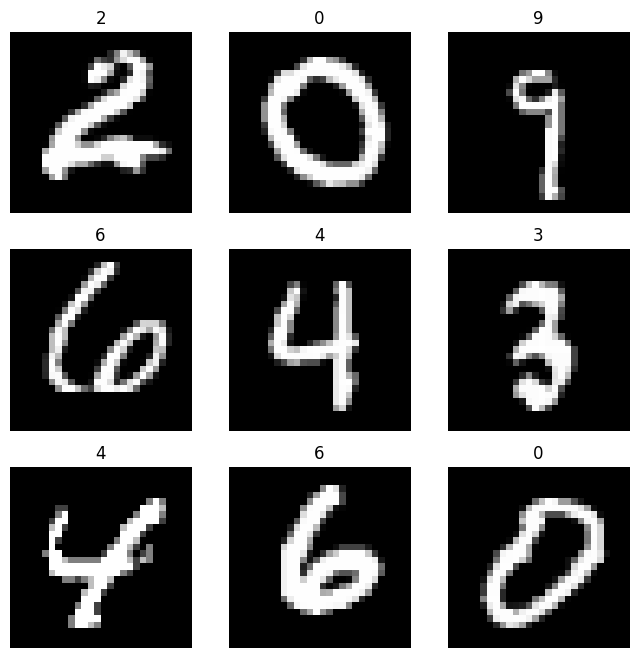

In [30]:
# Labeling 
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}


# Training Dataset understanding 

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):

    # randomly selects an index from training dataset.
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    print('sample Index is :',sample_idx)

    # retrieves the image & the label at the randomly selected index.
    img, label = train_dataset[sample_idx]
    print('lable ',label) # at the sample_idx we do have this lableed Number
    print('img ',img) # printing tensors of the lable's image

    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    
plt.show()

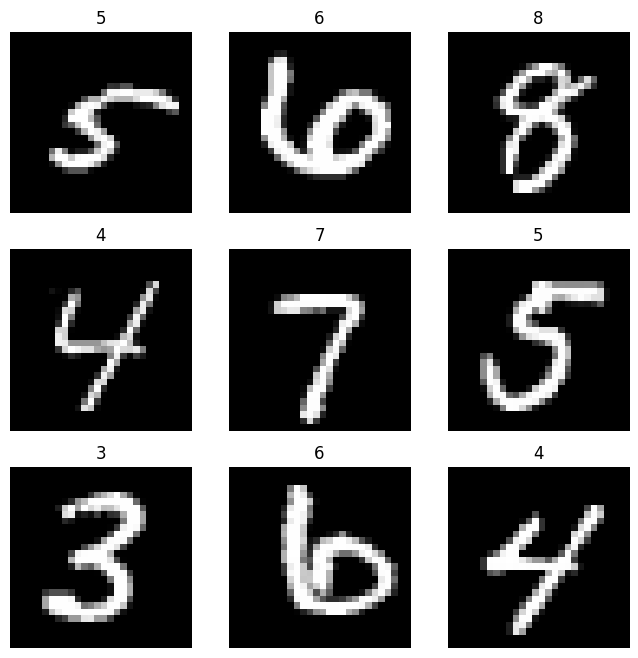

In [31]:
# Test DataSet understanding

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):

    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

In [32]:
class imgModel(nn.Module):
    def __init__(self,input_features=28*28,hiddenL1=20,hiddenL2=20,out_features=10):
        super(imgModel, self).__init__()

        # Fully Connected Layers 
        self.fullyConected1 = nn.Linear(input_features, hiddenL1)
        self.fullyConected2 = nn.Linear(hiddenL1, hiddenL2)

        # Output Layer
        self.fullyConected3 = nn.Linear(hiddenL2, out_features)
 
    # Forward Prapogation 
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fullyConected1(x))
        x = torch.relu(self.fullyConected2(x))
        x = self.fullyConected3(x)
        return x

# Initializing NN
model = imgModel()

In [33]:
# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()

    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # before computing the gradients, we reset the existing gradients in the optimizer using zero.grad() & This is necessary because PyTorch accumulates gradients by default.
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = loss_function(outputs, labels)

        # Backward Propagation
        loss.backward()

        # This updates the model’s parameters using the gradients calculated in the previous step.
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.5817456930875777
Epoch 1, Batch 200, Loss: 0.7975903993844986
Epoch 1, Batch 300, Loss: 0.5703352263569832
Epoch 1, Batch 400, Loss: 0.5013387824594975
Epoch 1, Batch 500, Loss: 0.45954809606075286
Epoch 1, Batch 600, Loss: 0.42556227907538413
Epoch 1, Batch 700, Loss: 0.40258374243974687
Epoch 1, Batch 800, Loss: 0.37747749596834185
Epoch 1, Batch 900, Loss: 0.3698939211666584
Epoch 2, Batch 100, Loss: 0.35638349637389183
Epoch 2, Batch 200, Loss: 0.330983345285058
Epoch 2, Batch 300, Loss: 0.32772988721728324
Epoch 2, Batch 400, Loss: 0.34903924614191056
Epoch 2, Batch 500, Loss: 0.34337962843477726
Epoch 2, Batch 600, Loss: 0.29720841512084006
Epoch 2, Batch 700, Loss: 0.3246668590605259
Epoch 2, Batch 800, Loss: 0.3108455365896225
Epoch 2, Batch 900, Loss: 0.30644582614302635
Epoch 3, Batch 100, Loss: 0.2948181314021349
Epoch 3, Batch 200, Loss: 0.29174371644854546
Epoch 3, Batch 300, Loss: 0.26907544702291486
Epoch 3, Batch 400, Loss: 0.2691451242938638

In [34]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

Accuracy on test set: 0.9324333333333333%


In [35]:
# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)

        # to store the only indices of the maximum values 
        _, predicted = torch.max(outputs.data, 1)

        predictions.extend(predicted.numpy())  # To store the predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

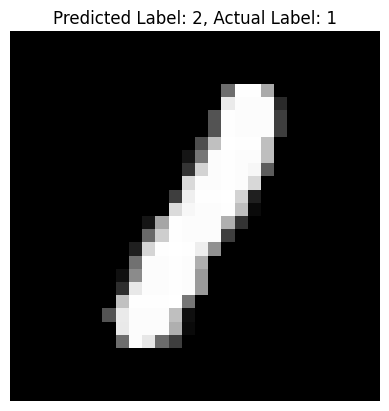

In [36]:
# test image and its label
image, label = images[1], labels[1]

# Reshape the image tensor with a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()


# Step 4. Choose one of the proposed modifications below:

(1) Add another Dense layer of 128 nodes

(2) Increase the current number of nodes in the layer to 256

Hypothesize how it would change the performance results

# Step 5. Modify the model based on the chosen method and train

In [37]:
# --------------------------- 1) Creating Neural Network --------------------------- #


# Increase the current number of nodes in the layer to 256

class imgModel2(nn.Module):
    def __init__(self,input_features=28*28,hiddenL1=256,hiddenL2=256,out_features=10): # number of nodes for each layer = 256
        super(imgModel2, self).__init__()

        # Fully Connected Layers 
        self.fullyConected1 = nn.Linear(input_features, hiddenL1)
        self.fullyConected2 = nn.Linear(hiddenL1, hiddenL2)

        # Output Layer
        self.fullyConected3 = nn.Linear(hiddenL2, out_features)
 
    # Forward Prapogation 
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fullyConected1(x))
        x = torch.relu(self.fullyConected2(x))
        x = self.fullyConected3(x)
        return x

# Initializing NN
model = imgModel2()



# --------------------------- 2) Define the loss function and optimizer --------------------------- #

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()

    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # before computing the gradients, we reset the existing gradients in the optimizer using zero.grad() & This is necessary because PyTorch accumulates gradients by default.
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = loss_function(outputs, labels)

        # Backward Propagation
        loss.backward()

        # This updates the model’s parameters using the gradients calculated in the previous step.
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.8216563192009926
Epoch 1, Batch 200, Loss: 0.4069760565459728
Epoch 1, Batch 300, Loss: 0.32693513825535775
Epoch 1, Batch 400, Loss: 0.2948082199692726
Epoch 1, Batch 500, Loss: 0.250601394996047
Epoch 1, Batch 600, Loss: 0.22432635605335235
Epoch 1, Batch 700, Loss: 0.2056001903861761
Epoch 1, Batch 800, Loss: 0.21980300605297087
Epoch 1, Batch 900, Loss: 0.17740300484001637
Epoch 2, Batch 100, Loss: 0.16361661572009326
Epoch 2, Batch 200, Loss: 0.1541655832156539
Epoch 2, Batch 300, Loss: 0.1434497658163309
Epoch 2, Batch 400, Loss: 0.1395000022649765
Epoch 2, Batch 500, Loss: 0.14919630287215113
Epoch 2, Batch 600, Loss: 0.1286679812334478
Epoch 2, Batch 700, Loss: 0.13616192396730184
Epoch 2, Batch 800, Loss: 0.13416339579969644
Epoch 2, Batch 900, Loss: 0.13575974410399794
Epoch 3, Batch 100, Loss: 0.12122477527707815
Epoch 3, Batch 200, Loss: 0.10639786797575652
Epoch 3, Batch 300, Loss: 0.10490982469171285
Epoch 3, Batch 400, Loss: 0.1020324272848665

In [38]:

# --------------------------- 3) Evaluate the model -----------------------------------------------------

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')


# --------------------------- 4) Evaluate the model and store predictions -------------------------------
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)

        # to store the only indices of the maximum values 
        _, predicted = torch.max(outputs.data, 1)

        predictions.extend(predicted.numpy())  # To store the predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

Accuracy on test set: 0.9598833333333333%


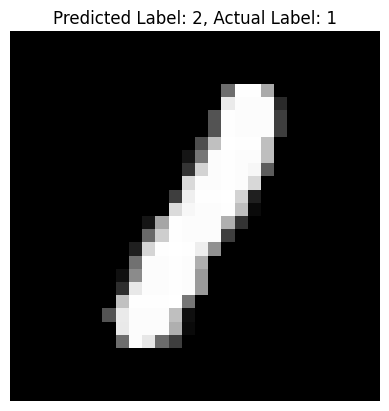

In [39]:
# ----------------------- 5) testing by printing the images ----------------------
# test image and its label
image, label = images[1], labels[1]

# Reshape the image tensor with a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

# Step 6. Report on the results of the modified model and if it matches your hypothesis

- By changing the number of layers, accuracy has been improve by 3%. Initially accuracy of the model was 93%. after modifying tyhe model it is 95.9%

# Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

- Activation_function = LeakyReLU (To handle dead neuron we should use LeakyReLU instead of ReLU)
- Optimizer = Rectified Adam (RAdam was contructed to rectify the problem of large variance in adaptive learning rates during the early stages of training when using Adam.)
- Loss Function = CrossEntropyLoss ( for categorical problem statement)
- Additional Hidden Layer 
- Aded DropOut Layet (to prevent overfitting, drop-out will be applied for each layer Separately)
- Number of nodes = 256



In [46]:
 # Increase the current number of nodes in the layer to 256

class imgModel3(nn.Module):
    def __init__(self,input_features=28*28,hiddenL1=256,hiddenL2=256,hiddenL3=256,out_features=10): # number of nodes for each layer = 256
        super(imgModel3, self).__init__()

        # Fully Connected Layers 
        self.fullyConected1 = nn.Linear(input_features, hiddenL1)
        self.fullyConected2 = nn.Linear(hiddenL1, hiddenL2)
        self.fullyConected3 = nn.Linear(hiddenL2, hiddenL3) # Additional Hidden Layer 
       
        # Drop out Layers 
        self.dropout1 = nn.Dropout(p=0.5) # Added Drop-Out Layer with 50% probability
        self.dropout2 = nn.Dropout(p=0.5) 


        # Output Layer
        self.fullyConected4 = nn.Linear(hiddenL2, out_features)
 
    # Forward Prapogation 
    def forward(self, x):
        x = x.view(-1, 28 * 28)

        x = torch.nn.functional.leaky_relu(self.fullyConected1(x))  # Activation_function = leaky_relu
        x = self.dropout1(x) # Applied Dropout for Hidden Layer 1

        x = torch.nn.functional.leaky_relu(self.fullyConected2(x))  # Activation_function = leaky_relu
        x = self.dropout2(x) # Applied Dropout for Hidden Layer 2

        x = torch.nn.functional.leaky_relu(self.fullyConected3(x))  # Activation_function = leaky_relu
        x = self.fullyConected3(x)
        
        return x

# Initializing NN
model = imgModel3()


# --------------------------- 2) Define the loss function and optimizer --------------------------- #

loss_function = nn.CrossEntropyLoss()
optimizer = optim.RAdam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()

    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # before computing the gradients, we reset the existing gradients in the optimizer using zero.grad() & This is necessary because PyTorch accumulates gradients by default.
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = loss_function(outputs, labels)

        # Backward Propagation
        loss.backward()

        # This updates the model’s parameters using the gradients calculated in the previous step.
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 3.7366437911987305
Epoch 1, Batch 200, Loss: 1.6810274422168732
Epoch 1, Batch 300, Loss: 0.8896588832139969
Epoch 1, Batch 400, Loss: 0.6676722273230553
Epoch 1, Batch 500, Loss: 0.5606166249513627
Epoch 1, Batch 600, Loss: 0.48623803436756136
Epoch 1, Batch 700, Loss: 0.4595847661793232
Epoch 1, Batch 800, Loss: 0.4430290637910366
Epoch 1, Batch 900, Loss: 0.4112911847233772
Epoch 2, Batch 100, Loss: 0.3927712500095367
Epoch 2, Batch 200, Loss: 0.3530459678173065
Epoch 2, Batch 300, Loss: 0.36615049198269844
Epoch 2, Batch 400, Loss: 0.3580970196425915
Epoch 2, Batch 500, Loss: 0.3567818574607372
Epoch 2, Batch 600, Loss: 0.32858804054558277
Epoch 2, Batch 700, Loss: 0.3276499843597412
Epoch 2, Batch 800, Loss: 0.34698652662336826
Epoch 2, Batch 900, Loss: 0.3280080150067806
Epoch 3, Batch 100, Loss: 0.3128465385735035
Epoch 3, Batch 200, Loss: 0.3124746183678508
Epoch 3, Batch 300, Loss: 0.286273477524519
Epoch 3, Batch 400, Loss: 0.30057216607034204
Epoch 

In [47]:

# --------------------------- 3) Evaluate the model -----------------------------------------------------

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')


# --------------------------- 4) Evaluate the model and store predictions -------------------------------
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)

        # to store the only indices of the maximum values 
        _, predicted = torch.max(outputs.data, 1)

        predictions.extend(predicted.numpy())  # To store the predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

Accuracy on test set: 0.9590333333333333%


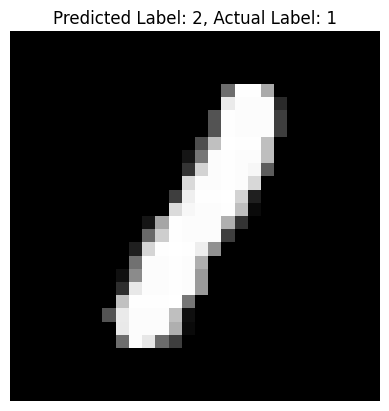

In [48]:
# ----------------------- 5) testing by printing the images ----------------------
# test image and its label
image, label = images[1], labels[1]

# Reshape the image tensor with a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

After, performing these many changes, we observed almost no changes in the accuracy. with and without those changes, we got 95.9% of accuracy. 